## Problem 2 - Plotting temperatures (7 points)

In this problem we will  plot monthly mean temperatures from the Helsinki-Vantaa airpot for the past 30 years.

The final output should look like this:
![line plot](img/temp_line_plot.png)

## Input data

File `data/helsinki-vantaa.csv` monthly average temperatures from Helsinki Vantaa airport. Column descriptions:

- `DATE`: YEAR-MONTH-DAY (the time stamp contains the first day of each month, but values in other columns are average values for the whole month!)
- `USAF`: Station number
- `TEMP_F`: Monthly mean temperature in Fahrenheit 
- `TEMP_C`: Monthly mean temperature in Celsius
- `REF_TEMP_C`: Long term average in Celsius (for the period 1988-2018)
- `DIFF_C`: Difference between monthly mean and long term average in Celsius


### Part 1

Load the Helsinki temperature data (`data/helsinki-vantaa.csv`)

- Read the data into variable called `data` using pandas
- Parse dates from the column `'DATE'` and set the dates as index in the dataframe 

In [1]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
import pandas as pd
#read csv -file, make index DATE, parse_dates make all column DATE values to datetime format
data = pd.read_csv('data/helsinki-vantaa.csv', na_values=['*', '**', '***', '****', '*****', '******'], \
                  index_col='DATE', parse_dates=['DATE'])

In [2]:
# This test print should print first five rows
print(data.head())

               USAF     TEMP_F    TEMP_C  REF_TEMP_C    DIFF_C
DATE                                                          
1952-01-01  29740.0  28.347826 -2.028986    -4.93665  2.907665
1953-01-01  29740.0  22.190083 -5.449954    -4.93665 -0.513304
1954-01-01  29740.0  19.864407 -6.741996    -4.93665 -1.805346
1955-01-01  29740.0  22.583333 -5.231481    -4.93665 -0.294831
1956-01-01  29740.0  18.254237 -7.636535    -4.93665 -2.699885


In [3]:
# Check the number of rows in the data frame
print(len(data))

706


### Part 2

Select data for a 30 year period (January 1988 - December 2018)

- Store the selection in a new variable `selection`

In [4]:
#store values from selected dates
selection = data.loc['1988-01-01':'2018-12-31']

In [5]:
# Check that the data was read in correctly:
selection.head()

,USAF,TEMP_F,TEMP_C,REF_TEMP_C,DIFF_C
DATE,,,,,
1988-01-01,29740.0,27.404003,-2.553332,-4.93665,2.383318
1989-01-01,29740.0,31.553337,-0.248146,-4.93665,4.688504
1990-01-01,29740.0,25.030890,-3.871728,-4.93665,1.064922
1991-01-01,29740.0,26.592345,-3.004253,-4.93665,1.932397
1992-01-01,29740.0,29.107965,-1.606686,-4.93665,3.329964


In [6]:
# Check how many rows of data you selected:
print("Number of rows:", len(selection))

Number of rows: 372


### Part 3

#### Part 3.1

Create a line plot that displays the temperatures (`TEMP_C`) for yeach month in the 30 year time period:
     
- Adjust line style:
    - solid line 
    - black color
    - round markers
     
- Add title and axis labels:
    - title: `"Helsinki-Vantaa Airport"` 
    - X-label should be `"Time"`
    - Y-label should be `"Temperature (Celsius)"`

#### Part 3.2

Save your figure as PNG file called `temp_line_plot.png`.

**HINTS:**
- Use `%matplotlib inline` to view the plot in this notebook 
- Control the figure size:
    - Create a figure object and use the `figsize` parameter. 
    - The example figure uses `figsize=(14,6)` (you can experiment also with other figure sizes!)
- You can control the marker size using parameter `markersize` when plotting. The example plot uses markersize 3.
- You can add the grid lines using: `plt.grid()`.

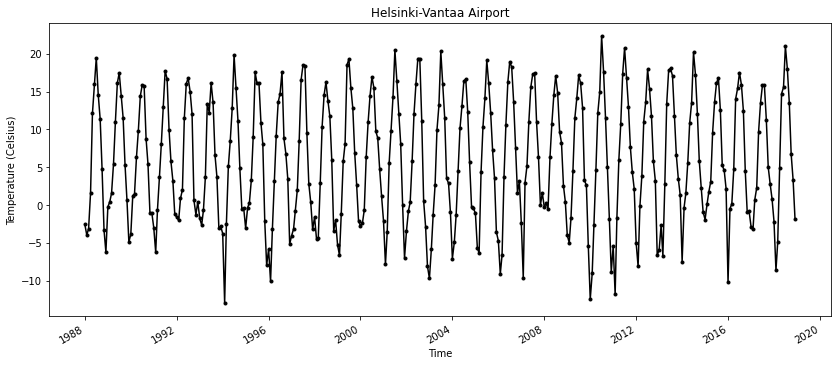

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline
# add figuresize to plot
plt.rcParams['figure.figsize'] = [14, 6]
plt.grid()

ax = selection['TEMP_C'].plot(markersize = 3, marker = 'o', color = 'black', linestyle = 'solid', \
                   title = 'Helsinki-Vantaa Airport', xlabel = 'Time', ylabel = 'Temperature (Celsius)')

# Set output file name
outputfp = "temp_line_plot.png"
# Save plot as image
plt.savefig(outputfp) 

In [8]:
import os

#Check that output file exists (also open the file and check that the plot looks ok!)
os.path.exists(outputfp)

True

**REMINDER**: Don't forget to upload your figure and the modified notebook into your personal GitHub repository!

### Done!

### Optional extra task: interactive plot

Create an interactive version of the monthly temperatures using [Pandas Bokeh](https://github.com/PatrikHlobil/Pandas-Bokeh)!

In [9]:
# Import and enable pandas bokeh in this notebook
import pandas_bokeh

pandas_bokeh.output_notebook()
pd.set_option('plotting.backend', 'pandas_bokeh')

Loading BokehJS ...

In [10]:
start_time = pd.to_datetime('198801010000')
end_time = pd.to_datetime('201812310000')
#sort_values show days and years from 1988 ->
selection2 = selection.sort_values('DATE')
# ylim make celsius range between -40 - +40
ax = selection2['TEMP_C'].plot(marker = 'o', color = 'blue', \
                   title = 'Helsinki-Vantaa Airport', xlabel = 'Time', ylabel = 'Temperature (Celsius)', \
                   xlim=['1988-01-01', '2018-12-31'], ylim=[-40.0, 40.0])
